<a href="https://colab.research.google.com/github/nirmala211/Digiretail_aassignment/blob/master/gender_classificationflux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, InputLayer
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import os 

In [11]:
path_folder='/content/drive/My Drive/gender_classification/train_n/images'
train_csv_file='/content/drive/My Drive/gender_classification/train.csv'

In [12]:
file_name=os.listdir(path_folder)
type(file_name)## cheking the type of datasets

list

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
print('total size of image ',len(file_name))

total size of image  13210


In [15]:
train=pd.read_csv(train_csv_file)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


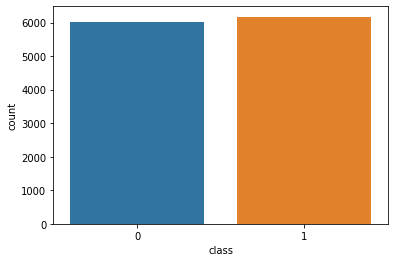

In [16]:
import seaborn as sns
sns.countplot(x="class", data=train)
plt.show()

In [17]:
print('Class 1:',train[train['class']==1].count()[0])
print('Class 0:',train[train['class']==0].count()[0])

Class 1: 6174
Class 0: 6022


In [18]:
### verify the same file is available in image folder or not 
yescount=0
nocount=0
available_image=[]
for image_name in train['image_names']:
  if image_name in file_name:
    yescount=yescount+1
    available_image.append(image_name)

  else:
    nocount=nocount+1  


print(yescount)
print(nocount)

9248
2948


In [19]:
print(train['class'][0])
print(train['image_names'][0])

1
11413.jpg


In [20]:
count=0
label=[]
image=[]
for i,file_name in enumerate(train['image_names']):
  if file_name in available_image:
    label.append(train['class'][i])
    image.append(train['image_names'][i])
    count=count+1
  else:
    pass   
print(count)

9248


In [21]:
image[:10]

['11413.jpg',
 '5950.jpg',
 '10454.jpg',
 '12791.jpg',
 '15255.jpg',
 '5751.jpg',
 '4395.jpg',
 '22994.jpg',
 '26404.jpg',
 '5485.jpg']

In [22]:
import numpy as np
y=np.array(label[:9248])# chnage 9k

In [23]:
path='/content/drive/My Drive/gender_classification/train_n/images/11413.jpg'

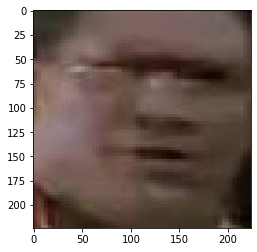

male label :1


In [24]:
from matplotlib import pyplot as plt
import cv2
img = cv2.imread(path, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print('male label :1')

(224, 224, 3)


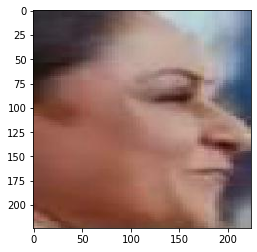

Female label :0


In [25]:
img = cv2.imread('/content/drive/My Drive/gender_classification/train_n/images/5950.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)
plt.show()
print('Female label :0')

In [26]:
X_train = np.zeros((9248, 224, 224, 3), dtype=np.uint8)# change here for 9k image 
print(X_train.shape)

(9248, 224, 224, 3)


In [27]:
for n, image_name in enumerate(available_image[:50]):
  img=cv2.imread('/content/drive/My Drive/gender_classification/train_n/images/'+str(image_name))
  X_train[n] = img


In [28]:
X=X_train

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
import os
import sys
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.layers import Dense, Activation, Flatten
import tensorflow as tf
import cv2

In [31]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
		optimizer='rmsprop',
		metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=15, batch_size=8)

Epoch 1/15
810/810 [==============================] - 13s 16ms/step - loss: 1.6257 - accuracy: 0.5829
Epoch 2/15
810/810 [==============================] - 13s 16ms/step - loss: 0.7944 - accuracy: 0.5849
Epoch 3/15
810/810 [==============================] - 13s 15ms/step - loss: 0.7366 - accuracy: 0.5849
Epoch 4/15
810/810 [==============================] - 13s 16ms/step - loss: 0.7263 - accuracy: 0.5858
Epoch 5/15
810/810 [==============================] - 13s 16ms/step - loss: 0.6999 - accuracy: 0.5857
Epoch 6/15
810/810 [==============================] - 13s 16ms/step - loss: 0.6975 - accuracy: 0.5854
Epoch 7/15
810/810 [==============================] - 13s 16ms/step - loss: 0.7041 - accuracy: 0.5858
Epoch 8/15
810/810 [==============================] - 13s 16ms/step - loss: 0.7497 - accuracy: 0.5857
Epoch 9/15
810/810 [==============================] - 13s 16ms/step - loss: 0.7322 - accuracy: 0.5861
Epoch 10/15
810/810 [==============================] - 13s 16ms/step - loss: 0.787